In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
td = pd.read_csv('transaction_data.csv')
td.head(10)

,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
0,10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,12.29,165.89
1,10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,3.46,46.66
2,10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,21.12,285.12
3,10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,103.68,1399.68
4,10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,48.00,648.00
5,10293,4,8/29/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,10,36.0,2.88,38.88
6,10293,4,8/29/2023,Nancy Davolio,63,Vegie-spread,7,"Pavlova, Ltd.",35.1,5,175.5,14.04,189.54
7,10293,4,8/29/2023,Nancy Davolio,75,Rhnbru Klosterbier,12,Plutzer Lebensmittelgromrkte AG,6.2,6,37.2,2.98,40.18
8,10304,4,9/12/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,10,440.0,35.20,475.20
9,10304,4,9/12/2023,Nancy Davolio,71,Flotemysost,15,Norske Meierier,17.2,2,34.4,2.75,37.15


In [4]:
td.describe()

,TransactionID,CustID,ProductID,VendorID,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,10661.179601,38.942350,40.389505,14.318551,25.908899,12.631929,324.537568,25.962971,350.500540
std,243.094311,25.056615,22.277628,8.217175,28.613063,6.395421,403.982507,32.318600,436.301107
min,10248.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.800000,0.380000,5.180000
25%,10454.000000,17.000000,21.000000,7.000000,12.000000,7.000000,100.000000,8.000000,108.000000
50%,10656.000000,35.000000,41.000000,14.000000,18.400000,12.000000,210.000000,16.800000,226.800000
75%,10864.000000,60.000000,60.000000,21.000000,31.230000,20.000000,394.000000,31.520000,425.520000
max,11077.000000,89.000000,77.000000,29.000000,263.500000,24.000000,4216.000000,337.280000,4553.280000


## Normalizaton 

In [13]:
# Extract Vendors Table
vendors_table = td[['VendorID', 'ProductVendor']].drop_duplicates()

vendors_table

,VendorID,ProductVendor
0,14,Formaggi Fortini s.r.l.
1,10,Refrescos Americanas LTDA
2,28,Gai pturage
3,8,"Specialty Biscuits, Ltd."
4,7,"Pavlova, Ltd."
7,12,Plutzer Lebensmittelgromrkte AG
9,15,Norske Meierier
10,13,Nord-Ost-Fisch Handelsgesellschaft mbH
11,24,"G'day, Mate"
12,25,Ma Maison


In [43]:
products_table = td[['ProductID', 'ProductName', 'VendorID', 'UnitPrice']].drop_duplicates()

products_table

,ProductID,ProductName,VendorID,UnitPrice
0,32,Mascarpone Fabioli,14,25.60
1,24,Guaran Fantstica,10,3.60
2,59,Raclette Courdavault,28,44.00
3,20,Sir Rodney's Marmalade,8,64.80
4,18,Carnarvon Tigers,7,50.00
...,...,...,...,...
828,42,Singaporean Hokkien Fried Mee,20,9.80
913,50,Valkoinen suklaa,23,13.00
965,5,Chef Anton's Gumbo Mix,2,21.35
1119,5,Chef Anton's Gumbo Mix,2,17.00


In [29]:
#Employee Table
employees_table = td[['Employee']].drop_duplicates()
#Add Employee IDs 
employees_table['EmployeeID'] =  np.arange(1, 10)
# Rearrange the columns
employees_table = employees_table[['EmployeeID', 'Employee']]

employees_table

,EmployeeID,Employee
0,1,Nancy Davolio
221,2,Andrew Fuller
366,3,Janet Leverling
562,4,Margaret Peacock
827,5,Steven Buchanan
900,6,Michael Suyama
1018,7,Robert King
1119,8,Laura Callahan
1291,9,Anne Dodsworth


Relationships:
Transaction is linked to: Customer via CustID and Product via ProductID
Product is linked to: Vendor via VendorID

## Product Insights 

At first glance this dataset provides vaulabe data point which we can use to generante key insights

In [7]:
# Calculate total revenue for each product and list them
product_revenue = td.groupby('ProductName')['OrderTotal'].sum().sort_values(ascending=False)

# Display the product revenue list
product_revenue


ProductName
Thringer Rostbratwurst       39943.16
Cte de Blaye                 33865.02
Tarte au sucre               18876.56
Manjimup Dried Apples        17618.48
Gnocchi di nonna Alice       17400.96
                               ...   
Chocolade                      895.05
Aniseed Syrup                  864.00
Geitost                        716.04
Genen Shouyu                   703.08
Louisiana Hot Spiced Okra      679.32
Name: OrderTotal, Length: 77, dtype: float64

Out of 77 products offered revenue seems to vary maybe visually looking at the data could help determine what products are driving sales

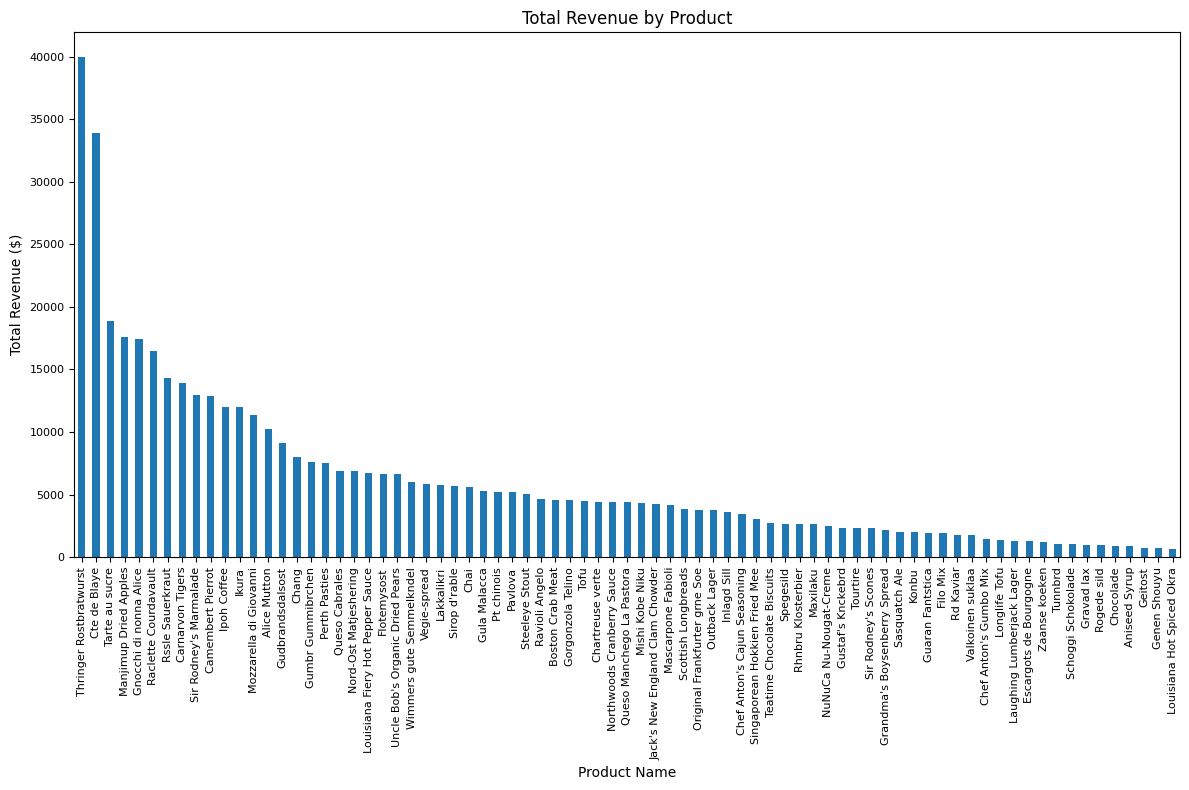

In [8]:
# Plotting the total revenue for each product
plt.figure(figsize=(12, 8))
product_revenue.plot(kind='bar', fontsize=8)

# Adding labels and title
plt.title('Total Revenue by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the chart
plt.show()


There appears to be a couple of products that seem to out sell by a visibly large margin I wonder why that is?

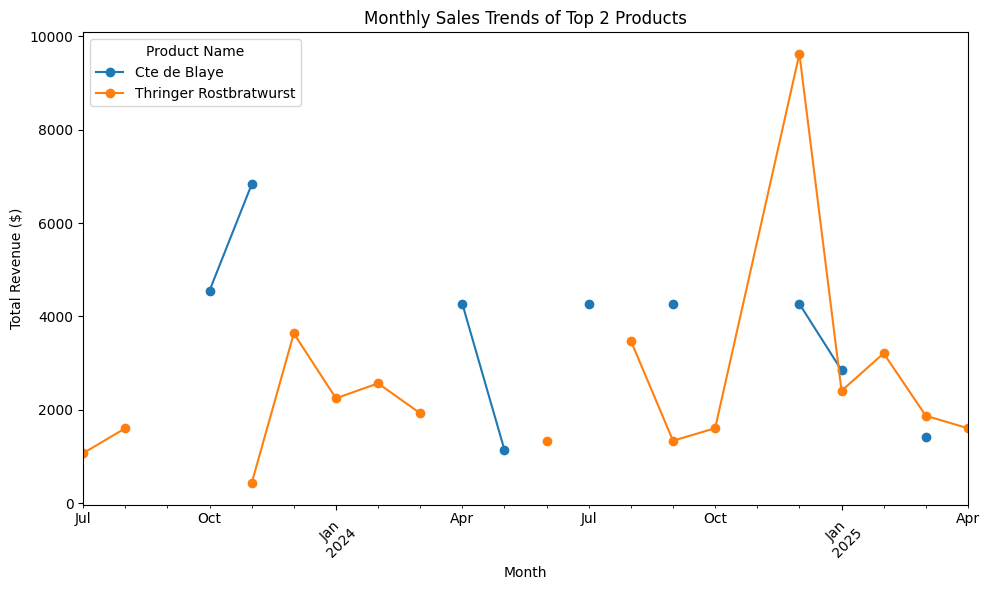

In [9]:
# Convert 'Date' column to datetime format for trend analysis
td['Date'] = pd.to_datetime(td['Date'])

# Filter data for the top 2 products by revenue
top_2_products = product_revenue.index[:2]
top_2_data = td[td['ProductName'].isin(top_2_products)]

# Group by product and month to analyze monthly sales trends
top_2_trends = top_2_data.groupby([top_2_data['Date'].dt.to_period('M'), 'ProductName'])['OrderTotal'].sum().unstack()

# Plotting the sales trends for the top 2 items
plt.figure(figsize=(10, 6))
top_2_trends.plot(kind='line', marker='o', ax=plt.gca())

# Adding labels and title
plt.title('Monthly Sales Trends of Top 2 Products')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.legend(title='Product Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


Although there arent any visible trends relating to the sales of Côte de Blaye it is the second highest seller, keeping this item in stock year round should be a priorty. 

Thüringer Rostbratwurst on the other hand tends to spike in sales during the holidays, continued marketing during this time would be smart to drive sales further

In [11]:
# Calculate the number of unique items each vendor supplies
vendor_unique_items = td.groupby('ProductVendor')['ProductName'].nunique()

# Combine total revenue and unique item count into a single DataFrame
vendor_analysis = pd.DataFrame({
    'Total Revenue ($)': vendor_revenue,
    'Unique Items': vendor_unique_items
}).sort_values(by='Total Revenue ($)', ascending=False)

# Display the combined analysis
vendor_analysis


,Total Revenue ($),Unique Items
ProductVendor,,
Plutzer Lebensmittelgromrkte AG,66755.17,5
"Pavlova, Ltd.",39040.42,5
Aux joyeux ecclsiastiques,38312.89,2
Gai pturage,29366.29,2
"G'day, Mate",27077.33,3
Forts d'rables,24533.92,2
Pasta Buttini s.r.l.,22084.71,2
"Specialty Biscuits, Ltd.",21942.87,4
Leka Trading,20335.55,3


Plutzer Lebensmittelgromrkte AG nearly doubles total revenue compared to Pavlova, Ltd. Although offer a diversity in their products offered with 5 unique items each. This suggests they are critical vendors for overall sales performance. 

Vendors such as Zaanse Snoepfabriek, Refrescos Americanas LTDA, and Escargots Nouveaux provide low inventory and generate minimal revenue. These vendors might need reassessment

## Employee Performance 

Lets take a look at how each of our employees are doing 


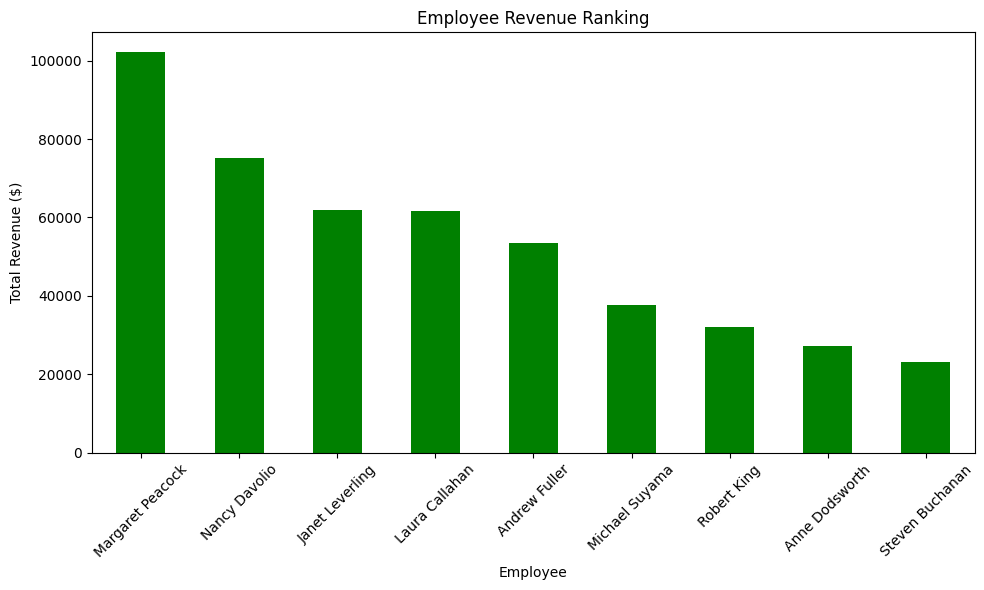

In [42]:
# Calculate total revenue generated by each employee
employee_revenue = td.groupby('Employee')['OrderTotal'].sum().sort_values(ascending=False)

# Bar chart to show employee revenue ranking
plt.figure(figsize=(10, 6))
employee_revenue.plot(kind='bar', color='green')

# Adding title and labels
plt.title('Employee Revenue Ranking')
plt.xlabel('Employee')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

Margaret is by far the top performer!
